# SI 670: Applied Machine Learning. HW7 - Deep Learning
## Due 11:59pm, 11/21

In this assignment, we'll build a simple CNN to detect a *smile* in an image. The data is given in the 'datasets.zip'. If you are using Colab, you should run the cell below to load the data. If you are using Jupyter Notebook, you should unzip the file for later use.

In [0]:
# # run this cell if you are using Colab

# !rm -rf datasets.zip
# !rm -rf datasets

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()

# !unzip datasets.zip

## Question 1 (20 points)

First, you need to build data generators to pre-process the data.

Please build a *train_generator* and a *validation_generator* that rescale all the images by 1./255. The images should be resized with size (32, 32). Set the batch_size to 50 and the class_mode as 'binary'. The *train_generator* should take data from the directory 'datasets/train_folder' and the *validation_generator* should take data from the directory 'datasets/test_folder'. 



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Your code here ...
import keras
train_dir = 'datasets/train_folder'
validation_dir = 'datasets/test_folder'

In [1]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(32, 32),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=50,
        class_mode='binary')

NameError: name 'ImageDataGenerator' is not defined

data batch shape: (50, 32, 32, 3)
labels batch shape: (50,)


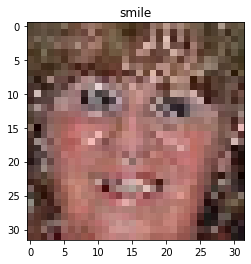

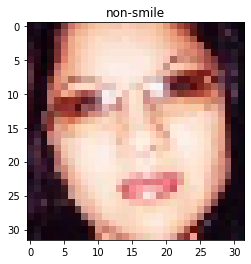

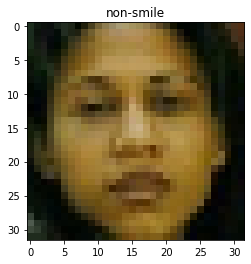

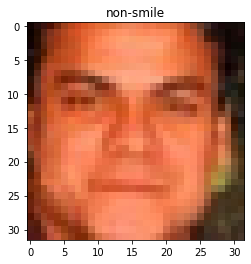

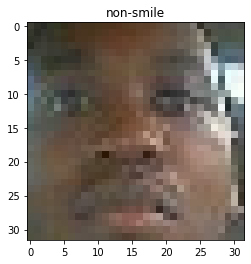

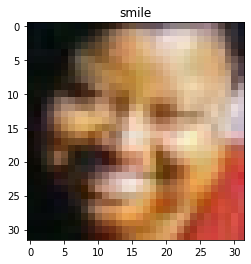

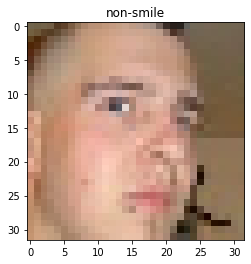

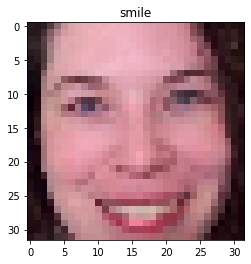

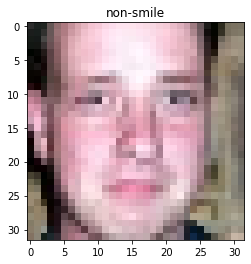

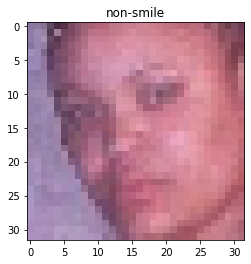

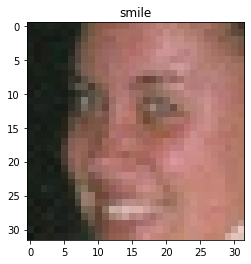

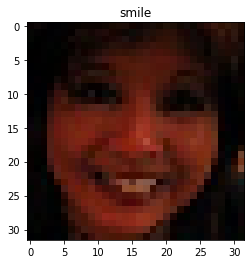

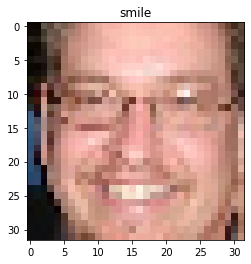

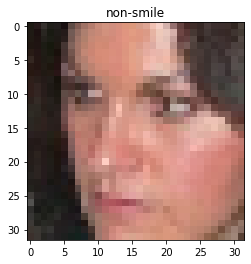

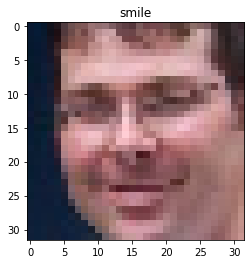

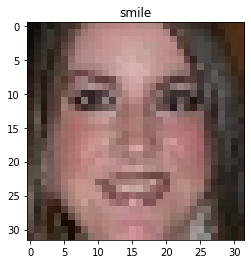

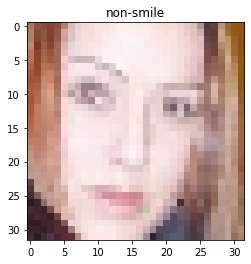

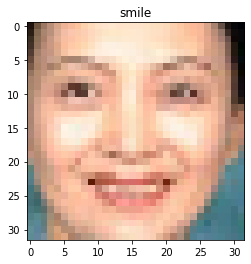

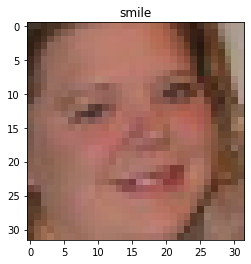

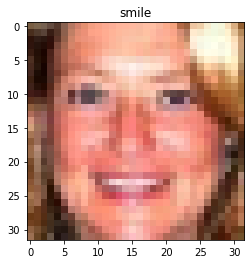

In [14]:
# # You can verify whether your data generator looks good by using this code
# # The data is not perfect so don't be suprised if you see some non-faces :)
%matplotlib inline
from matplotlib import pyplot as plt
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    for i in range(20):
        plt.figure()
        plt.imshow(data_batch[i])
        if labels_batch[i] == 1:
            plt.title('smile')
        else:
            plt.title('non-smile')
    break

## Question 2 (20 points)

Let's build the model using Keras - we want a sequential model.

The first layer is a convolutional layer. Use *Conv2D* with $32$ filters, kernel size $(3,3)$ and *relu* as activation. You also need to specify the input shape since it is the first layer. Here we want input shape to be $(32\times32\times3)$. 

The second layer is the same as the first one, except that we don't need to specify input shape here.

The third layer is *MaxPooling2D* layer with *pool_size* to be $(2,2)$.

The fouth layer is *Dropout* layer with dropout rate 0.25.

Then we need a *Flatten* layer to change the shape of features.

Then a *Dense* layer with output dimension $128$ and *relu* as the activation.

Then a *Dropout* layer with dropout rate 0.5.

Finally a *Dense* layer with output dimension $1$, which are the labels, and *sigmoid* as the activation.

Here are some useful links: https://keras.io/layers/convolutional/#conv2d, https://keras.io/layers/pooling/#maxpooling2d, https://keras.io/layers/core/#dropout, https://keras.io/layers/core/#flatten, https://keras.io/layers/core/#dense

You can use *model.summary()* to see a summary of your model.

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D


# Your code here
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

## Question 3 (20 points) 

Now we'll train the model.

First you need to specify the loss function and the optimizer to be used for model training. Please use the 'binary_corssentropy' loss and 'RMSprop' optimizer with lr=1e-4. You also need to specify the metric to be used for evaluation. In this case please use the 'acc' metric.

Then use *model.fit_generator()* to fit the model with steps_per_epoch=100, epochs=100, and validation_steps=50.

In [0]:
from keras import optimizers

# Your code here



## Question 4 (20 points) 

Finally we'll have some inspections on the model.

### (a) (10 points)

Use the history data in model to see the accuracy and loss curves (in a single figure) for both training and validation data. https://keras.io/visualization/#training-history-visualization



In [0]:
# add code here to visualize the accuracy and loss curves for both training and validation data


In [0]:
# import numpy as np
# def print_indicator(data, model, class_names, bar_width=50):
#     plt.figure(figsize=(5,5))
#     plt.imshow(data)
#     probabilities = model.predict(np.array([data]))[0]
#     left_count = int(probabilities[0] * bar_width)
#     right_count = bar_width - left_count
#     left_side = '-' * left_count
#     right_side = '-' * right_count
#     plt.title(class_names[0] + ' ' + left_side + '%.3f' % probabilities[0] + right_side + ' ' + class_names[1])

# from matplotlib import pyplot as plt

# for data_batch, labels_batch in validation_generator:
#     for i in range(20):
#         img = data_batch[i] 
#         print_indicator(img, model, ['Non-Smiling', 'Smiling'])
#     break

### (b) (10 points)
Try changing the all the 'relu' activations to 'tanh' of your previous model and repeat the training in Q3. 

In [0]:
# Your code here
